# Ejercicio 3

En este notebook se probará el caso donde se tiene un umbral difuso, a modo de ver qué es lo que ocurre con el método de Monte Carlo y el método desarrollado en los ejercicios anteriores.

Para ello, se tomará el código creado anteriormente y se realizarán modificaciones para agregar una probabilidad de falla al umbral, donde se tiene que a medida que se avanza hacia el umbral, la probabilidad de falla aumenta de acuerdo a la probabilidad acumulada de una normal centrada en el umbral.

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, bernoulli
import scipy.integrate as integrate
import time

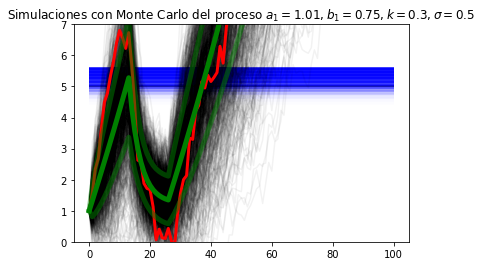

1.0 1000


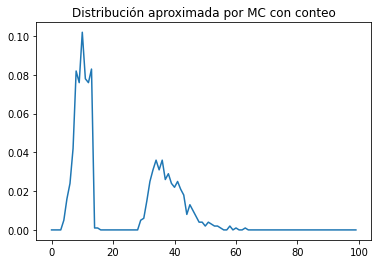

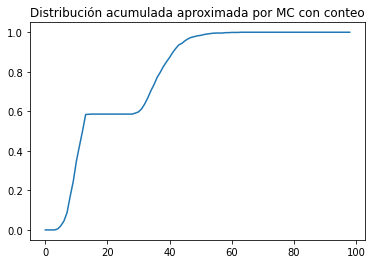

In [72]:
# primero se crea el proceso

x_0 = 1
N = 100

proceso = np.zeros((N,))
proceso[0] = x_0
a1 = 1.01
b1 = 0.75
sigma = 0.5
np.random.seed(32)
u = 5
sigma_u = 0.2
K = 0.3

# definicion de las iteraciones de MC
M = 1000
PROCESOS = np.zeros((N,M))
PROCESOS[0, :] = x_0
np.random.seed(42)

cuentas = np.zeros((M,))
histogram_MC = np.zeros((N,))
acumulada = np.zeros((N - 1,))

I, J = [13, 26]

# media y varianza analiticas
E = np.zeros((N,))
Var = np.zeros((N,))

E[0] = proceso[0]



for i in range(I):
    proceso[i + 1] = K + a1 * proceso[i] + np.random.normal(0, sigma)
    PROCESOS[i + 1, :] = K + a1 * PROCESOS[i,:] + np.random.normal(0, sigma, size=(M,))
    
    # en este paso hay que calcular la probabilidad de que falle por solo estar cerca del umbral
    # hay que sacar la cdf de una normal centrada en el umbral
    p = norm.cdf(PROCESOS[i, :], loc=u, scale=sigma_u)
    d = bernoulli.rvs(p)

    anterior = np.sum(cuentas)
    checkeo = d == 1
    cuentas[checkeo] = 1
    
    histogram_MC[i] = np.sum(cuentas) - anterior
    acumulada[i] = acumulada[i - 1] + histogram_MC[i]
    
    # media y varianza
    E[i + 1] = K + a1 * E[i]
    Var[i + 1] = a1 ** 2 * Var[i] + sigma**2
    

for i in range(I, J):
    proceso[i + 1] = K + a1 * b1 * proceso[i] + np.random.normal(0, sigma)
    PROCESOS[i + 1, :] = K + a1 * b1 * PROCESOS[i,:] + np.random.normal(0, sigma, size=(M,))
    
    p = norm.cdf(PROCESOS[i, :], loc=u, scale=sigma_u)
    d = bernoulli.rvs(p)

    anterior = np.sum(cuentas)
    # sobre el umbral
    checkeo = d == 1
    cuentas[checkeo] = 1
    
    histogram_MC[i] = np.sum(cuentas) - anterior
    acumulada[i] = acumulada[i - 1] + histogram_MC[i]
    
    # media y varianza
    E[i + 1] = K + a1 * b1 * E[i]
    Var[i + 1] = a1 ** 2 * b1 ** 2 * Var[i] + sigma**2

for i in range(J, int((N-1))):
    proceso[i + 1] = K + a1 * proceso[i] + np.random.normal(0, sigma)
    PROCESOS[i + 1, :] = K + a1 * PROCESOS[i,:] + np.random.normal(0, sigma, size=(M,))
    
    p = norm.cdf(PROCESOS[i, :], loc=u, scale=sigma_u)
    d = bernoulli.rvs(p)

    anterior = np.sum(cuentas)
    # sobre el umbral
    checkeo = d == 1
    cuentas[checkeo] = 1
    
    histogram_MC[i] = np.sum(cuentas) - anterior
    acumulada[i] = acumulada[i - 1] + histogram_MC[i]
    
    # media y varianza
    E[i + 1] = K + a1 * E[i]
    Var[i + 1] = a1 ** 2 * Var[i] + sigma**2

histogram_MC = histogram_MC / M
plt.plot(PROCESOS, color='k', alpha=0.05)
plt.plot(proceso, color='r', lw=3)
plt.plot(E, color='g', lw=5)
plt.plot(E - np.sqrt(Var), color='g', lw=5, alpha=0.5)
plt.plot(E + np.sqrt(Var), color='g', lw=5, alpha=0.5)
plt.hlines(u,0,N)
plt.ylim(top=u*1.4, bottom=0)

# pintar zona de peligro
zona_peligro = np.linspace(u - 3 * sigma_u, u + 3 * sigma_u, num=50)
prob_zona_peligro = norm.cdf(zona_peligro, loc=u, scale=sigma_u)
for i, z in enumerate(zona_peligro):
#     print(i, z, prob_zona_peligro[i])
    plt.hlines(z, 0, N, alpha=np.min((prob_zona_peligro[i], 1)), color='b')

plt.title('Simulaciones con Monte Carlo del proceso $a_1={}, b_1={}, k={}, \sigma={}$'.format(a1,b1,K,sigma))
plt.show()

print(np.sum(histogram_MC), M)
plt.plot(histogram_MC)
plt.title('Distribución aproximada por MC con conteo')
plt.show()

plt.plot(acumulada / M)
plt.title('Distribución acumulada aproximada por MC con conteo')
plt.show()



In [22]:
a = np.linspace(0, 1, num=10)
for i in range(9):
    print(bernoulli.rvs(a))

[0 0 0 0 1 0 1 1 1 1]
[0 0 0 1 1 0 1 1 1 1]
[0 0 0 0 0 1 1 1 1 1]
[0 0 0 0 0 0 1 1 1 1]
[0 0 0 0 1 0 0 1 0 1]
[0 0 0 0 0 0 1 1 1 1]
[0 1 0 0 1 0 0 1 1 1]
[0 0 0 1 0 1 0 1 1 1]
[0 0 0 1 0 1 1 1 0 1]
